In [1]:
# საჭირო ბიბლიოთეკები
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.scimath import sqrt as csqrt
from sympy import *
from sympy.solvers.solveset import linsolve

მაგალითად, გვჭირდება მიმდევრობით ჩართული წინაღობის, კონდენსატორისა და ინდუქტორის შეერთებაში დენის დროზე დამოკიდებულების გაგება. თუ სწორად შევარჩევთ მათ მნიშვნელობებს, დაგვიჯდება დიფერენციალური განტოლება, რომელშიც თუ აღვნიშნავთ საძებნ ფუნქციას y-ით, ექნება შემდეგი სახე:

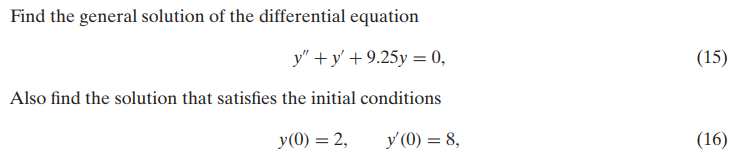

მახასიათებელი განტოლების ფესვებია: 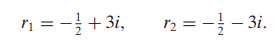
ქვემოთ მოყვანილი კოდის შედეგიც შესაბამისობაში მოდის წიგნის მაგალითში მიღებულ შედეგთან:

In [2]:
a, b, c = 1, 1, 9.25

D = b**2 - 4*a*c
r1, r2 = (-b + csqrt(D))/(2*a), (-b - csqrt(D))/(2*a)

# მახასიათებელი განტოლების ფესვები
r1, r2

((-0.5+3j), (-0.5-3j))

In [3]:
# გრაფიკის ასაგებად მომზადება: ვიღებ 100 თანაბრად დაშორებულ წერტილს [0, 10] შუალედში
t = np.linspace(0, 10, 100)
# ვწერ ექსპონენციალურ ფუნქციას:
y1_exp = np.e**(r1*t)
y2_exp = np.e**(r2*t)
# იგივე ფუნქციები გაშლილი ეილერის იდენტობით:
y1_trig = np.e**(r1.real*t)*(np.cos(r1.imag*t)+1j*np.sin(r1.imag*t))
y2_trig = np.e**(r2.real*t)*(np.cos(r2.imag*t)+1j*np.sin(r2.imag*t))

exp და trig ფუნქციებს კომპლექსური მნიშვნელობები აქვთ. მათი გრაფიკის დახატვას თუ ვცდით, ფუნქციის მნიშვნელობებს წარმოსახვითი ნაწილი ჩამოშორდებათ, რაც გასაგებია. y1 და y2 ფუნქციების მხოლოდ წარმოსახვითი ნაწილი განსხვავდება, ამიტომ მათი გრაფიკები ნამდვილ ღერძზე ემთხვევა და აქვს ასეთი სახე:

C:\Users\Luka\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


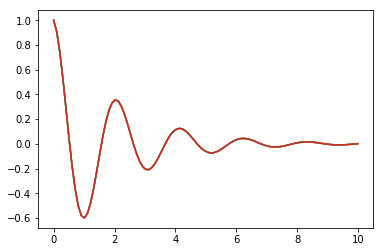

In [4]:
plt.plot(t, y1_exp, t, y1_trig, t, y2_exp, t, y2_trig);

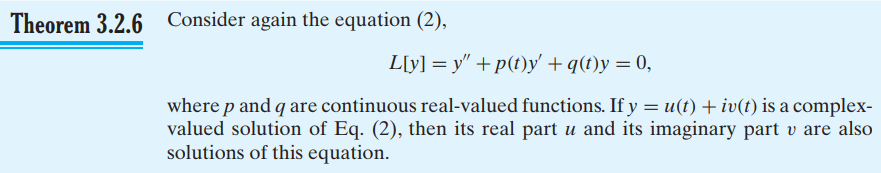

ზევით მოცემული თეორემის მიხედვით, შეგვიძლია ჩავწეროთ ნამდვილი მნიშვნელობის მქონე ამონახსნებიც: 

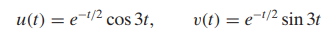

ვპოულობთ მუდმივებს რომლებიც საწყის პირობას აკმაყოფილებენ:

In [5]:
c1, c2, t = symbols("c1 c2 t")
u = np.e**(r1.real*t)*cos(r1.imag*t)
v = np.e**(r1.real*t)*sin(r1.imag*t)
y = c1*u + c2*v
dydt = diff(y, t)
solve([y.subs(t, 0) - 2, dydt.subs(t, 0) - 8], (c1, c2))

{c1: 2.00000000000000, c2: 3.00000000000000}

ავაგოთ საწყისი პირობის ამოცანის ამონახსნის გრაფიკი:

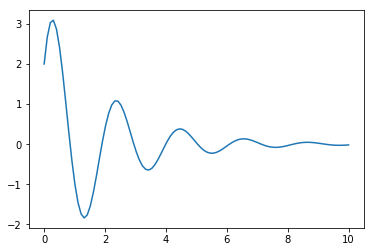

In [6]:
t = np.linspace(0, 10, 100)
y = np.e**(r1.real*t)*(2*np.cos(r1.imag*t)+3*np.sin(r1.imag*t))
plt.plot(t, y);

რაც წიგნში მაგალითის ამონახსნსაც შეესაბამება და თუ ამ მიმდევრობით ამოვხსნით გასაგებია, მაგრამ თუ გადავწყვეტთ, რომ დავიტოვოთ კომპლექსურმნიშვნელობიანი ამონახსნები, მაშინ, არსებობისა და ერთადერთობის თეორემის მიხედვით, ამონახსნი უნდა იყოს ზუსტად იგივე. 

მაგალითად, y1 და y2, შესაბამისად, იყოს კომპლექსური და ნამდვილი ამონახსნები. არის თუ არა შემდეგი ტოლობა ჭეშმარიტი: y1 = y2 ყველა t-სთვის? თუ კი, პირველ რიგში, როგორ უნდა მივიდეთ იგივე ამონახსნამდე? ნიშნავს ეს იმას, რომ კომპლექსური ამონახსნებისთვის მუდმივებიც კომპლექსური იქნება და საბოლოო ჯამში მხოლოდ ნამდვილ ღერძზე განსაზღვრულ ფუნქციას მივიღებთ?

როგორი ფიზიკური ინტერპრეტაცია უნდა მივცეთ კომპლექსურ ამონახსნს? მაგალითად, რას ნიშნავს დენის კომპლექსური მნიშვნელობა? თუ კომპლექსური ფუნქციები უბრალოდ აკმაყოფილებენ საწყის განტოლებას მაგრამ ფიზიკურ შინაარსს არ ატარებენ?

In [7]:
c1, c2, t = symbols("c1 c2 t")
# convert y1_trig & y2_trig to expressions
y1 = np.e**(r1.real*t)*(cos(r1.imag*t)+1j*sin(r1.imag*t))
y2 = np.e**(r2.real*t)*(cos(r2.imag*t)+1j*sin(r2.imag*t))
# general solution in complex terms
y = c1*y1 + c2*y2
dydt = diff(y, t)

In [8]:
solve([y.subs(t, 0) - 2, dydt.subs(t, 0) - 8], (c1, c2))

{c2: 1.0 + 1.5*I, c1: 1.0 - 1.5*I}

0.367879441171442**(0.5*t)*(3.0*sin(3.0*t) + 2.0*cos(3.0*t))


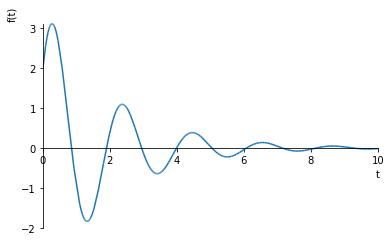

In [9]:
y = y.subs([(c1, 1 - 1.5*I), (c2, 1 + 1.5*I)])
print(simplify(y))
plot(y, (t, 0, 10));

პ.ს. ზემოთ დაწერილი კოდით ითვლება მუდმივები კომპლექსური ფუნქციებისთვის. ეს მუდმივები მართლაც კომპლექსურები აღმოჩნდნენ და როგორც ჩანს მიღებული, გამარტივებული ფუნქცია ნამდვილ ფუნქციასაც ემთხვევა (ასეც უნდა ყოფილიყო). ეს პასუხს სცემს ზემოთ დასმული კითხვების უმრავლესობას, მაგრამ რჩება შეკითხვა კომპლექსური ფიზიკური სიდიდეების შინაარსის შესახებ.